## before model building

In [23]:
import pandas as pd 
import numpy as np
df=pd.read_csv('/Users/hexiaoyu/Desktop/Courses/INSY- DATA MINING/Attrition.csv')
df = df.dropna()
X=df.drop(['EmployeeID', 'Over18', 'Attrition'],axis=1)
categorical_columns = X.select_dtypes(include=['object']).columns
X= pd.get_dummies(X, columns=categorical_columns, drop_first=True)


In [24]:
X

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,6,1,131160,1.0,11,0,1.0,6,1,...,False,False,False,False,False,False,False,False,True,False
1,31,10,1,41890,0.0,23,1,6.0,3,5,...,False,False,False,False,False,True,False,False,False,True
2,32,17,4,193280,1.0,15,3,5.0,2,5,...,False,False,False,False,False,False,True,False,True,False
3,38,2,3,83210,3.0,11,3,13.0,5,8,...,True,False,False,False,False,False,False,False,True,False
4,32,10,1,23420,4.0,12,2,9.0,2,6,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,4,2,35390,1.0,18,0,6.0,2,6,...,True,False,False,False,False,False,False,False,False,True
4405,42,5,1,60290,3.0,17,1,10.0,5,3,...,False,False,False,False,False,True,False,False,False,True
4406,29,2,1,26790,2.0,15,0,10.0,2,3,...,False,True,False,False,False,False,False,False,False,False
4407,25,25,2,37020,0.0,20,0,5.0,4,4,...,False,False,False,False,False,False,True,False,True,False


In [25]:
X.dtypes

Age                                    int64
DistanceFromHome                       int64
JobLevel                               int64
MonthlyIncome                          int64
NumCompaniesWorked                   float64
PercentSalaryHike                      int64
StockOptionLevel                       int64
TotalWorkingYears                    float64
TrainingTimesLastYear                  int64
YearsAtCompany                         int64
YearsSinceLastPromotion                int64
YearsWithCurrManager                   int64
JobInvolvement_Low                      bool
JobInvolvement_Medium                   bool
JobInvolvement_Very High                bool
PerformanceRating_Outstanding           bool
EnvironmentSatisfaction_Low             bool
EnvironmentSatisfaction_Medium          bool
EnvironmentSatisfaction_Very High       bool
JobSatisfaction_Low                     bool
JobSatisfaction_Medium                  bool
JobSatisfaction_Very High               bool
WorkLifeBa

In [26]:
# Standardize
### Type your code here ###
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## apply PCA

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=49)
pca.fit(scaled_X)

PCA(n_components=49)

In [28]:
PCA(n_components=49)

PCA(n_components=49)

In [29]:
pca.explained_variance_ratio_

array([0.06218276, 0.04962961, 0.03900166, 0.03773633, 0.03605643,
       0.03450868, 0.03245989, 0.03033974, 0.02853996, 0.02769214,
       0.02734255, 0.02718312, 0.02663709, 0.02650208, 0.02629504,
       0.02499781, 0.02443582, 0.02359898, 0.0234967 , 0.02307605,
       0.02240152, 0.02231377, 0.02208576, 0.02147528, 0.0210308 ,
       0.02067511, 0.02045721, 0.01987315, 0.01947242, 0.01889034,
       0.01811694, 0.0175346 , 0.0172046 , 0.01411084, 0.01352525,
       0.0120306 , 0.0099768 , 0.00954828, 0.00819471, 0.00773821,
       0.00732103, 0.00550403, 0.00478668, 0.00441352, 0.00317938,
       0.00221798, 0.00206301, 0.00187958, 0.00026616])

In [30]:
pca.components_

array([[ 0.34447086,  0.01873116, -0.05037083, ..., -0.0352189 ,
         0.09419349, -0.10987697],
       [ 0.033469  ,  0.00620038,  0.0291637 , ..., -0.05964325,
        -0.01388684, -0.01239082],
       [-0.03886214, -0.03063404, -0.03985603, ...,  0.0133406 ,
        -0.09912064,  0.07181758],
       ...,
       [ 0.00572751, -0.00114674,  0.01247348, ...,  0.08367176,
         0.03208049,  0.02511795],
       [ 0.03288145,  0.01550913, -0.00152969, ..., -0.16050038,
         0.01765041,  0.02344272],
       [-0.00852029,  0.00717116, -0.00258387, ...,  0.00150947,
        -0.00655126, -0.00425178]])

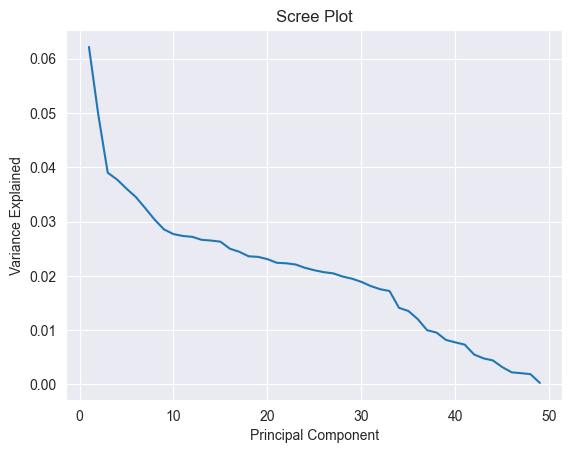

In [31]:
# Scree plot
import matplotlib.pyplot as plt
import numpy as np
PC_values = np.arange(pca.n_components_) + 1 # adding 1 because in python we start from 0
plt.plot(PC_values, pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

choose the n_components according to either the  pca.explained_variance_ratio_(where the figure start to became constantly unchanged/ just a little change) or through the plot visually see where the transition point of the gradient change.

In [32]:
# Create PCA-transformed data
### Type your code here ###
pca = PCA(n_components=10) # 10 is the final selection of components
pca.fit(scaled_X)
X_new = pca.transform(scaled_X) # create new dataframe 

## isolation forest 

In [34]:
### Type your code here ###
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df = X.copy()
df['Attrition'] = y.tolist()
df

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,51,6,1,131160,1.0,11,0,1.0,6,1,...,False,False,False,False,False,False,False,True,False,0
1,31,10,1,41890,0.0,23,1,6.0,3,5,...,False,False,False,False,True,False,False,False,True,1
2,32,17,4,193280,1.0,15,3,5.0,2,5,...,False,False,False,False,False,True,False,True,False,0
3,38,2,3,83210,3.0,11,3,13.0,5,8,...,False,False,False,False,False,False,False,True,False,0
4,32,10,1,23420,4.0,12,2,9.0,2,6,...,False,False,False,False,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,4,2,35390,1.0,18,0,6.0,2,6,...,False,False,False,False,False,False,False,False,True,0
4405,42,5,1,60290,3.0,17,1,10.0,5,3,...,False,False,False,False,True,False,False,False,True,0
4406,29,2,1,26790,2.0,15,0,10.0,2,3,...,True,False,False,False,False,False,False,False,False,0
4407,25,25,2,37020,0.0,20,0,5.0,4,4,...,False,False,False,False,False,True,False,True,False,0


In [35]:
df.columns


Index(['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement_Low',
       'JobInvolvement_Medium', 'JobInvolvement_Very High',
       'PerformanceRating_Outstanding', 'EnvironmentSatisfaction_Low',
       'EnvironmentSatisfaction_Medium', 'EnvironmentSatisfaction_Very High',
       'JobSatisfaction_Low', 'JobSatisfaction_Medium',
       'JobSatisfaction_Very High', 'WorkLifeBalance_Best',
       'WorkLifeBalance_Better', 'WorkLifeBalance_Good',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'Education_Below College', 'Education_College', 'Education_Doctor',
       'Education_Master', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',


In [36]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100, contamination=.01)
pred = iforest.fit_predict(X) # The label, if it is anomaly, the pred=-1
score = iforest.decision_function(X)
# Extracting anomalies
from numpy import where
anomaly_index = where(pred==-1)
anomaly_values = df.iloc[anomaly_index]